## Imports

In [215]:
import json
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt


## Load the Dataset

In [216]:
train_dataset = './student_6/train.json'

with open(train_dataset, 'r') as f:
    data = [json.loads(line) for line in f]

df = pd.DataFrame(data)


## Calculating Dimensionality

In [217]:
tweets = df['Tweet']

countvectorizer = CountVectorizer()
tfidfvectorizer = TfidfVectorizer()

token_counts = countvectorizer.fit_transform(tweets)
tfidf_features = tfidfvectorizer.fit_transform(tweets)

token_counts_array = token_counts.toarray()
tfidf_features_array = tfidf_features.toarray()

tokens_counts_dimensionality = token_counts_array.shape[1]
tfidf_features_dimensionality = tfidf_features_array.shape[1]

print(f"Count Vectorizer Dimensionality: {tokens_counts_dimensionality}")
print(f"TF-IDF Vectorizer Dimensionality: {tfidf_features_dimensionality}")


Count Vectorizer Dimensionality: 9634
TF-IDF Vectorizer Dimensionality: 9634


## Work with 4 Selected Classes

In [218]:
emotions = df[['anger', 'anticipation', 'disgust', 'fear', 'joy', 'love', 'optimism', 'pessimism', 'sadness', 'surprise', 'trust']]
selected_classes = ['sadness', 'fear', 'anger', 'optimism']

df['emotions_count'] = emotions.sum(axis=1)
filtered_df = df[df['emotions_count'] == 1] #this df contains only singe-emotion lines

filtered_tweets = filtered_df['Tweet']

filtered_token_counts = countvectorizer.fit_transform(filtered_tweets)
filtered_tfidf_features = tfidfvectorizer.fit_transform(filtered_tweets)

scaler = StandardScaler()
filtered_token_counts_normalized = scaler.fit_transform(filtered_token_counts.toarray())

pca_counts = PCA(n_components=2)
pca_tfidf = PCA(n_components=2)

#pca for 'single-emotion' lines:
pca_token_counts = pca_counts.fit_transform(filtered_token_counts_normalized) 
pca_tfidf_features = pca_tfidf.fit_transform(filtered_tfidf_features) 

class_labels = filtered_df[selected_emotions].values


## Multiclass Handling 

#### By default, filtered data that uses lines with a single emotion is used.
#### Uncomment the lines below for PCA on data where multiple emotions are allowed.

In [219]:
# token_counts_normalized = scaler.fit_transform(token_counts_array)

# pca_token_counts = pca_counts.fit_transform(token_counts_normalized) 
# pca_tfidf_features = pca_tfidf.fit_transform(tfidf_features) 

# class_labels = df[selected_emotions].values


## Plotting 2D Points

sadness (CountVectorizer): 84 data points
fear (CountVectorizer): 75 data points
anger (CountVectorizer): 53 data points
optimism (CountVectorizer): 33 data points


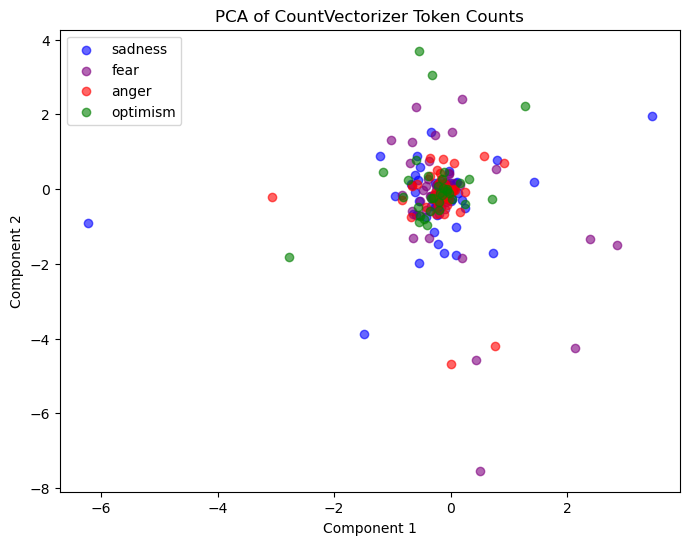

sadness (TfidfVectorizer): 84 data points
fear (TfidfVectorizer): 75 data points
anger (TfidfVectorizer): 53 data points
optimism (TfidfVectorizer): 33 data points


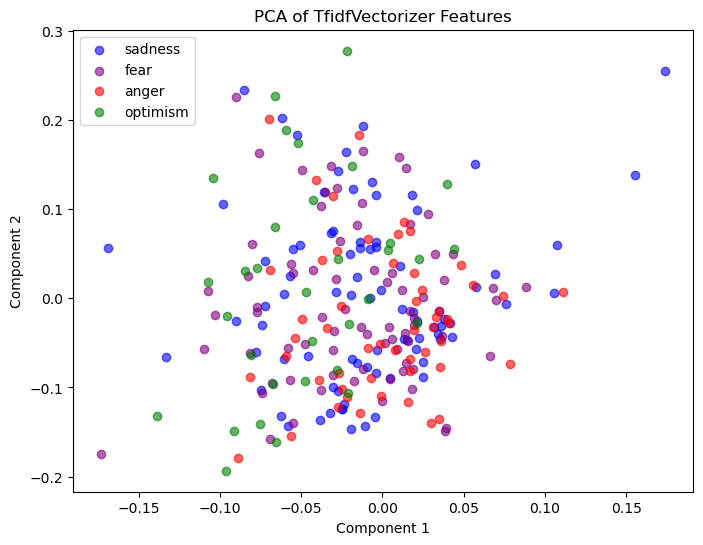

In [220]:

color_map = ['blue', 'purple', 'red', 'green']

plt.figure(figsize=(8, 6))
for i, emotion in enumerate(selected_classes):
    mask = class_labels[:, i]
    num_points = mask.sum()
    print(f"{emotion} (CountVectorizer): {num_points} data points")
    plt.scatter(pca_token_counts[mask, 0], pca_token_counts[mask, 1], 
                c=color_map[i], label=emotion, alpha=0.6)
plt.xlabel('Component 1')
plt.ylabel('Component 2')
plt.legend()
plt.title('PCA of CountVectorizer Token Counts')
plt.show()

plt.figure(figsize=(8, 6))
for i, emotion in enumerate(selected_classes):
    mask = class_labels[:, i]
    num_points = mask.sum()
    print(f"{emotion} (TfidfVectorizer): {num_points} data points")    
    plt.scatter(pca_tfidf_features[mask, 0], pca_tfidf_features[mask, 1], 
                c=color_map[i], label=emotion, alpha=0.6)
plt.xlabel('Component 1')
plt.ylabel('Component 2')
plt.legend()
plt.title('PCA of TfidfVectorizer Features')
plt.show()

### **Zero** classes are visually separable on both plots.